In [2]:
#import tflite_runtime.interpreter as tflite
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from picamera import PiCamera
from picamera.array import PiRGBArray
import serial
from time import sleep
#import tensorflow as tf

In [1]:
def capture(camera, i):
    camera.start_preview()
    with PiRGBArray(camera, size=(640,720)) as frame:
        label = input('Enter Label to capture (empty input skips action): ')
        if len(label) > 0:
            camera.capture(frame, 'rgb')
            plt.imshow(frame.array)
            cv.imwrite(f'images/img{i}.jpg', frame.array)
            #with open('images/headings.txt', 'a+') as fn:
            #    fn.write(f'{label},')
    camera.stop_preview()
    return i + 1

Enter Label to capture (empty input skips action): 0


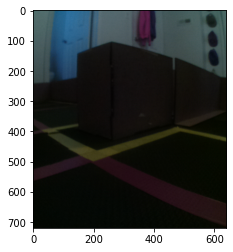

In [12]:
#camera = PiCamera(resolution=(640,720))

#ser = serial.Serial('/dev/ttyUSB1', 9600)
i = 0
missed = [96]
try:
    for i in missed:
        #drive = input('Enter Drive Step')
        #if drive == ' ':
        capture(camera, i)
        """else:
            msg = bytearray([1,100,100,int(drive)])
            ser.write(msg)
            sleep(.25)
            msg = bytearray([0,100,100,int(drive)])
            ser.write(msg)"""
             
except KeyboardInterrupt:
    print('Thanks for Driving!')

[24,27,28,29,30,31,32,37,38,39,40,41,42,62,63,64,65,66,67,90,91,92,93,97,97,114,115,116,117,118,119,120,131,132,133,134,135,139,140,141,142]

In [8]:
def load_data(path):    
    images = []

    for i in range(160):
        print(path + str(i) + '.jpg')
        images.append(cv.cvtColor(cv.imread(path + str(i) + '.jpg'),cv.COLOR_BGR2RGB))
        

    # initialze image data (input)
    images = np.array(images)
    #plt.imshow(images[7])

    # initialize normalized headings (output)
    with open('images/headings.txt', 'r') as f:
        headings = np.array(f.read().strip('\n').split(','))
        
    #le = OneHotEncoder()
    #encoded_headings = le.fit_transform(headings.reshape(len(headings), 1)).toarray()
    print(headings[:5])
    #print(encoded_headings[:5])
    
    return (images, headings.astype(np.float))

images/img0.jpg
images/img1.jpg
images/img2.jpg
images/img3.jpg
images/img4.jpg
images/img5.jpg
images/img6.jpg
images/img7.jpg
images/img8.jpg
images/img9.jpg
images/img10.jpg
images/img11.jpg
images/img12.jpg
images/img13.jpg
images/img14.jpg
images/img15.jpg
images/img16.jpg
images/img17.jpg
images/img18.jpg
images/img19.jpg
images/img20.jpg
images/img21.jpg
images/img22.jpg
images/img23.jpg
images/img24.jpg
images/img25.jpg
images/img26.jpg
images/img27.jpg
images/img28.jpg
images/img29.jpg
images/img30.jpg
images/img31.jpg
images/img32.jpg
images/img33.jpg
images/img34.jpg
images/img35.jpg
images/img36.jpg
images/img37.jpg
images/img38.jpg
images/img39.jpg
images/img40.jpg
images/img41.jpg
images/img42.jpg
images/img43.jpg
images/img44.jpg
images/img45.jpg
images/img46.jpg
images/img47.jpg
images/img48.jpg
images/img49.jpg
images/img50.jpg
images/img51.jpg
images/img52.jpg
images/img53.jpg
images/img54.jpg
images/img55.jpg
images/img56.jpg
images/img57.jpg
images/img58.jpg
images/

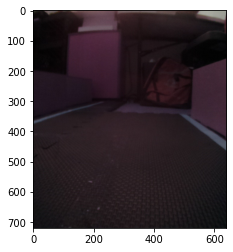

In [13]:
images, headings = load_data('images/img')

print(images.shape, headings.shape)
plt.imshow(images[-1])

In [5]:
#interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
print(input_details)
input_data = np.asarray([cv.cvtColor(cv.imread('images/img0.jpg'),cv.COLOR_BGR2RGB)], dtype=np.float32)
print(input_data.shape, type(input_data[0][0][0][0]))
input_tensor = tf.convert_to_tensor(input_data, np.float32)
interpreter.set_tensor(input_details[0]['index'], input_tensor)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[{'name': 'conv2d_5_input', 'index': 0, 'shape': array([  1, 720, 480,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}}]
(1, 720, 480, 3) <class 'numpy.float32'>


ValueError: Failed to convert value into readable tensor.

In [6]:
interpreter = tflite.Interpreter(model_path='test-model.tflite')

NameError: name 'tflite' is not defined

In [ ]:
model = tf.keras.models.load_model('lin_reg-2.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
